<a href="https://colab.research.google.com/github/lilian95520/ML-Predicting-university-student-performance/blob/main/projet_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Our goal : Predicting university student performance**

This project aims to predict students final grades (A, B, or C) based on demographic, academic, social and lifestyle factors. Using machine learning, the goal is to identify which variables strongly influence academic success. By building a predictive model, we can detect students at risk of low performance early and provide targeted academic or psychological support. This analysis can help universities design personalized learning strategies and improve student outcomes.

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import mutual_info_regression


# Descriptive analysis

In [2]:
df = pd.read_csv("Factors_ affecting_ university_student_grades_dataset.csv")
df.head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,...,Neutral,NaN,No,Visual,Yes,NaN,Low,2.0,NaN,B
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,...,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,NaN
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,...,Neutral,No,Yes,NaN,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,...,Neutral,No,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,...,Positive,No,No,Auditory,Yes,NaN,Medium,3.0,High,B


In [3]:
print(df.shape)
df.columns

(10064, 35)


Index(['Age', 'Gender', 'Parental_Education', 'Family_Income',
       'Previous_Grades', 'Attendance', 'Class_Participation', 'Study_Hours',
       'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement',
       'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels',
       'School_Environment', 'Professor_Quality', 'Class_Size',
       'Extracurricular_Activities', 'Sleep_Patterns', 'Nutrition',
       'Physical_Activity', 'Screen_Time', 'Educational_Tech_Use',
       'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring',
       'Mentoring', 'Lack_of_Interest', 'Time_Wasted_on_Social_Media',
       'Sports_Participation', 'Grades'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          9099 non-null   float64
 1   Gender                       9085 non-null   object 
 2   Parental_Education           9102 non-null   object 
 3   Family_Income                9097 non-null   object 
 4   Previous_Grades              9120 non-null   object 
 5   Attendance                   9060 non-null   float64
 6   Class_Participation          9098 non-null   object 
 7   Study_Hours                  9073 non-null   float64
 8   Major                        9136 non-null   object 
 9   School_Type                  9115 non-null   object 
 10  Financial_Status             9129 non-null   object 
 11  Parental_Involvement         9118 non-null   object 
 12  Educational_Resources        9129 non-null   object 
 13  Motivation      

In [5]:
df.isna().any()


,0
Age,True
Gender,True
Parental_Education,True
Family_Income,True
Previous_Grades,True
Attendance,True
Class_Participation,True
Study_Hours,True
Major,True
School_Type,True


In [6]:
df.isna().sum()

,0
Age,965
Gender,979
Parental_Education,962
Family_Income,967
Previous_Grades,944
Attendance,1004
Class_Participation,966
Study_Hours,991
Major,928
School_Type,949


In [7]:
df.describe()

,Age,Attendance,Study_Hours,Class_Size,Sleep_Patterns,Screen_Time,Time_Wasted_on_Social_Media
count,9099.000000,9060.000000,9073.000000,9114.000000,9048.000000,9120.000000,9137.000000
mean,19.996703,84.908499,12.467761,60.238754,6.538904,6.031469,3.489329
std,1.406885,8.985221,4.613845,23.337209,1.720632,2.597880,1.704057
min,18.000000,70.000000,5.000000,20.000000,4.000000,2.000000,1.000000
25%,19.000000,77.000000,9.000000,40.000000,5.000000,4.000000,2.000000
50%,20.000000,85.000000,12.000000,61.000000,7.000000,6.000000,3.000000
75%,21.000000,93.000000,16.000000,80.000000,8.000000,8.000000,5.000000
max,22.000000,100.000000,20.000000,100.000000,9.000000,10.000000,6.000000


The dataset shows that students have an average age of 20 years, with relatively low variation (standard deviation ≈ 1.4), indicating a fairly homogeneous population in terms of age. Attendance is on average high (≈85%), but ranges from 70% to 100%, suggesting that some students regularly miss classes despite the majority having consistent attendance. Study hours average 12.5 hours per week, with a standard deviation of 4.6, revealing high variability: some students dedicate only 5 hours, while others reach 20 hours. Class sizes vary widely, from 20 to 100 students, with an average around 60, which can influence the quality of classroom interaction and individual attention. Regarding lifestyle, sleep (Sleep_Patterns) averages 6.5 hours per night, which is slightly below the recommendation for young adults, and shows a range from 4 to 9 hours. Screen time (Screen_Time) averages 6 hours per day, and time wasted on social media (Time_Wasted_on_Social_Media) averages 3.5 hours per day, indicating that students spend a significant portion of their time on digital activities that could compete with study hours.Overall, these statistics suggest a fairly diligent and engaged student population, but with notable variations in study hours, sleep, and screen usage, all of which could be factors influencing grades. These observations point toward analyzing correlations between these behaviors and academic performance.

In [8]:
categorical_cols = [
    'Gender', 'Parental_Education', 'Class_Participation',
    'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement',
    'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels',
    'School_Environment', 'Professor_Quality', 'Extracurricular_Activities',
    'Nutrition', 'Physical_Activity', 'Educational_Tech_Use', 'Peer_Group',
    'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring', 'Mentoring',
    'Lack_of_Interest', 'Sports_Participation'
]

# Afficher la distribution en pourcentage
for col in categorical_cols:
    dist = df[col].value_counts(normalize=True) * 100
    print(f"\n{col} :")
    for cat, pct in dist.items():
        print(f"  {cat} : {pct:.1f}%")



Gender :
  F : 50.2%
  M : 49.8%

Parental_Education :
  Some College : 25.5%
  Graduate : 25.0%
  College : 24.8%
  High School : 24.6%

Class_Participation :
  Medium : 33.5%
  Low : 33.3%
  High : 33.2%

Major :
  Business : 17.3%
  Law : 17.2%
  Arts : 16.6%
  Science : 16.5%
  Medicine : 16.4%
  Engineering : 16.1%

School_Type :
  Public : 50.2%
  Private : 49.8%

Financial_Status :
  Low : 33.6%
  Medium : 33.3%
  High : 33.1%

Parental_Involvement :
  High : 34.2%
  Medium : 33.5%
  Low : 32.3%

Educational_Resources :
  Yes : 50.8%
  No : 49.2%

Motivation :
  High : 33.7%
  Medium : 33.3%
  Low : 33.0%

Self_Esteem :
  Low : 33.9%
  High : 33.2%
  Medium : 32.8%

Stress_Levels :
  Low : 33.8%
  Medium : 33.4%
  High : 32.8%

School_Environment :
  Neutral : 33.9%
  Negative : 33.4%
  Positive : 32.7%

Professor_Quality :
  Low : 33.8%
  Medium : 33.3%
  High : 32.9%

Extracurricular_Activities :
  Yes : 50.0%
  No : 50.0%

Nutrition :
  Balanced : 34.6%
  Unhealthy : 33.8%
 

# Pre-processing

## Part1

In [9]:
df = df.dropna(subset=['Grades'])

## Treatment of errors

In [10]:
df['Study_Hours']=df['Study_Hours'].replace({None:np.nan})

## Missing values

In [11]:
df["missing_count"] = df.isnull().sum(axis=1)


In [12]:
df_incomplete_5 = df[df["missing_count"] >= 1]

print(f"Lignes avec ≥ 8 valeurs manquantes : {len(df_incomplete_5)} / {len(df)}")


Lignes avec ≥ 8 valeurs manquantes : 8726 / 9024


In [13]:
df = df[df["missing_count"] < 8]


In [14]:
df.isna().sum()

,0
Age,849
Gender,828
Parental_Education,842
Family_Income,850
Previous_Grades,812
Attendance,871
Class_Participation,850
Study_Hours,845
Major,799
School_Type,828


The table shows that certain variables have a notable number of missing values, with up to 885 missing data points for Study_Space and approximately 871 for Attendance. Among the other important variables, Self_Esteem, Extracurricular_Activities, and Peer_Group also have several hundred missing values.

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Colonnes numériques : {len(num_cols)}")
print(f"Colonnes catégorielles : {len(cat_cols)}")


Colonnes numériques : 8
Colonnes catégorielles : 28


In [16]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


In [17]:
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])


To handle the missing values in our dataset, we decided to use two strategies adapted to the type of variable. For numerical variables, we employ a SimpleImputer with the median strategy, which allows us to replace missing values with the median of each column, thus reducing the impact of extreme values. For categorical variables, we use a SimpleImputer with the most frequent value strategy, in order to fill in missing data with the most common category in each column. This approach helps maintain the consistency of the dataset while minimizing information loss, thereby preparing the data for exploratory analysis and predictive modeling.

In [18]:
print("Valeurs manquantes restantes :", df.isnull().sum().sum())


Valeurs manquantes restantes : 0


In [19]:
df.duplicated().sum()

np.int64(0)

## Outliers

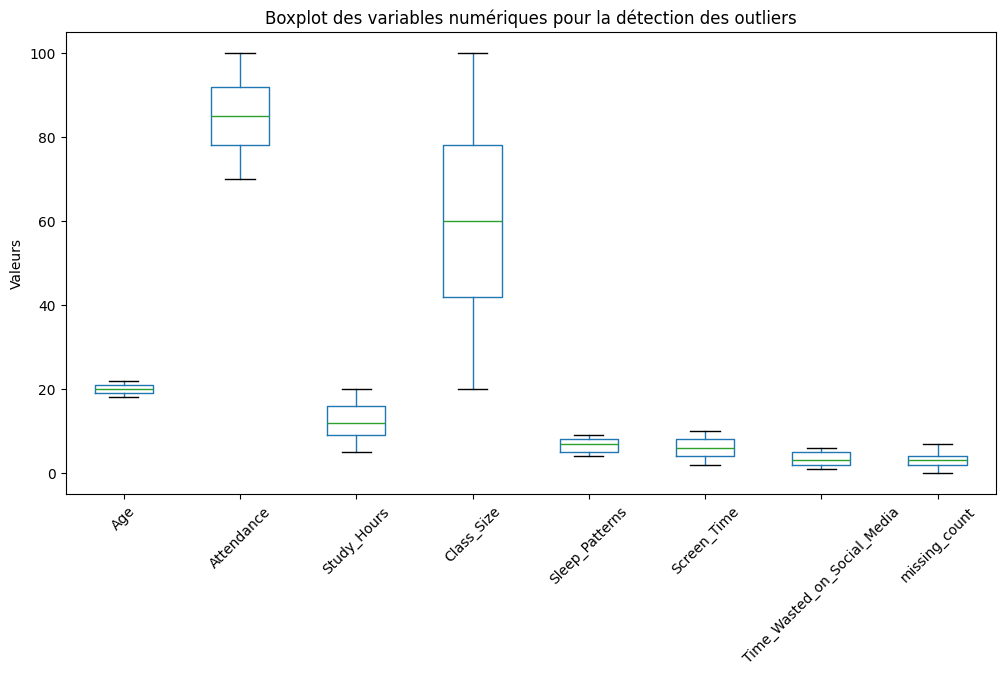

In [20]:
# 🔍 Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns

# 📊 Création du boxplot pour détecter les valeurs aberrantes
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Boxplot des variables numériques pour la détection des outliers")
plt.ylabel("Valeurs")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

## Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

# Liste des colonnes catégorielles à encoder
categorical_cols = [
    'Gender', 'Parental_Education', 'Class_Participation',
    'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement',
    'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels',
    'School_Environment', 'Professor_Quality', 'Extracurricular_Activities',
    'Nutrition', 'Physical_Activity', 'Educational_Tech_Use', 'Peer_Group',
    'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring', 'Mentoring',
    'Lack_of_Interest', 'Sports_Participation'
]

# Initialisation du label encoder
le = LabelEncoder()

# Application du label encoding sur chaque variable catégorielle
for col in categorical_cols :
    df[col] = le.fit_transform(df[col].astype(str))

# Vérification
display(df.head())

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades,missing_count
0,22.0,0,0,50000.0,A,81.0,2,8.0,3,0,...,1,0,2,1,1,1,2.0,1,B,3.0
2,19.0,1,0,75000.0,C,93.0,2,12.0,3,0,...,0,1,2,0,0,1,2.0,0,A,1.0
3,21.0,1,0,60000.0,A,86.0,1,15.0,1,1,...,0,1,0,1,1,1,3.0,2,C,3.0
4,19.0,0,3,40000.0,C,89.0,0,15.0,4,1,...,0,0,0,1,1,2,3.0,0,B,7.0
5,19.0,1,0,40000.0,C,82.0,2,14.0,3,0,...,0,1,0,1,0,1,5.0,1,C,5.0


In [22]:
grade_map = {'C': 0, 'B': 1, 'A': 2}

df["Previous_Grades_Num"] = df["Previous_Grades"].map(grade_map)
df["Grades_Num"] = df["Grades"].map(grade_map)

# Supprimer les colonnes avec lettres
df = df.drop(columns=['Grades', 'Previous_Grades'])

In [23]:
"""
grade_mapping = {
    'A': 3,
    'B': 2,
    'C': 1
}
df['Previous_Grades_Num']=df['Previous_Grades'].map(grade_mapping)
df['Grades_Num']=df['Grades'].map(grade_mapping)

# Supprimer les colonnes avec lettres
df = df.drop(columns=['Grades', 'Previous_Grades'])

# Vérification
display(df.head())
"""

"\ngrade_mapping = {\n    'A': 3,\n    'B': 2,\n    'C': 1\n}\ndf['Previous_Grades_Num']=df['Previous_Grades'].map(grade_mapping)\ndf['Grades_Num']=df['Grades'].map(grade_mapping)\n\n# Supprimer les colonnes avec lettres\ndf = df.drop(columns=['Grades', 'Previous_Grades'])\n\n# Vérification\ndisplay(df.head())\n"

## Creation of new variables

### Study_Efficiency

Study_Efficiency = Previous_Grades / Study_Hours

Why: measures the productivity of effort. A student who achieves good results with few hours of study has high cognitive efficiency.

This is a measure of academic performance per hour of study:
- The higher the score, the better the student's grades are with fewer hours -> very effective
- The lower the score, the worse the student's grades are despite many hours -> ineffective

In [24]:
df['Study_Efficiency'] = df['Previous_Grades_Num']/(df['Study_Hours'])

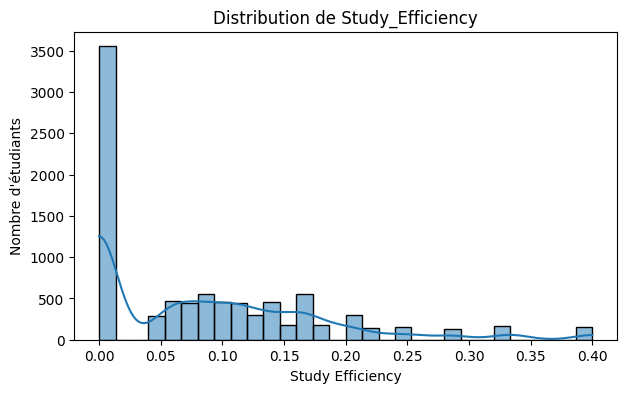

In [25]:
plt.figure(figsize=(7,4))
sns.histplot(df['Study_Efficiency'], bins=30, kde=True)
plt.title("Distribution de Study_Efficiency")
plt.xlabel("Study Efficiency")
plt.ylabel("Nombre d'étudiants")
plt.show()


Analyse:

In [26]:
print("Valeurs manquantes restantes :", df.isnull().sum().sum())

Valeurs manquantes restantes : 0


### Time_Management_Score

Time_Management_Score = Study_Hours / (Time_Wasted_on_Social_Media + Study_Hours)

Why: reflects discipline and time management, two major factors for success.   

This is a ratio between 0 and 1:
- The closer the score is to 1, the better the student's time management skills.
- The closer the score is to 0, the worse the student's time management skills and the more time they waste.

In [27]:
df['Time_Management_Score'] = df['Study_Hours'] / (df['Study_Hours'] + df['Time_Wasted_on_Social_Media'])

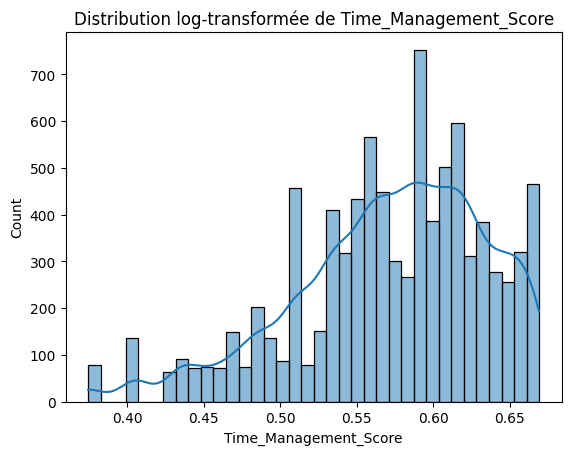

In [28]:
sns.histplot(np.log1p(df['Time_Management_Score'][df['Time_Management_Score'] > -1]), kde=True)
plt.title("Distribution log-transformée de Time_Management_Score")
plt.show()


Analyse:

In [29]:
print("Valeurs manquantes restantes :", df.isnull().sum().sum())

Valeurs manquantes restantes : 0


### Parental_Support_Score

Parental_Support_Score = standardize(Parental_Involvement + Financial_Status)

Why: strong parental support (both moral and financial) has a direct influence on academic success.

This score ranges from 0 to 2:
- The closer the score is to 2, the stronger and more balanced the family support.
- Around 1, the student receives moderate or uneven support (e.g., involved parents but limited finances, or the opposite).
- The closer the score is to 0, the weaker the support system, potentially leading to lower academic outcomes.

In [30]:
df['Parental_Support_Score'] = (df['Parental_Involvement'] + df['Financial_Status'])/2

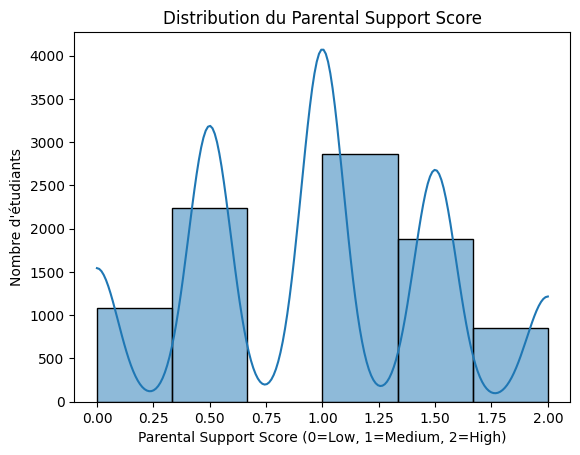

In [31]:
sns.histplot(df['Parental_Support_Score'], bins=6, kde=True)
plt.title('Distribution du Parental Support Score')
plt.xlabel('Parental Support Score (0=Low, 1=Medium, 2=High)')
plt.ylabel('Nombre d\'étudiants')
plt.show()

In [32]:
print("Valeurs manquantes restantes :", df.isnull().sum().sum())

Valeurs manquantes restantes : 0


In [33]:
print(df.columns)


Index(['Age', 'Gender', 'Parental_Education', 'Family_Income', 'Attendance',
       'Class_Participation', 'Study_Hours', 'Major', 'School_Type',
       'Financial_Status', 'Parental_Involvement', 'Educational_Resources',
       'Motivation', 'Self_Esteem', 'Stress_Levels', 'School_Environment',
       'Professor_Quality', 'Class_Size', 'Extracurricular_Activities',
       'Sleep_Patterns', 'Nutrition', 'Physical_Activity', 'Screen_Time',
       'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space',
       'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest',
       'Time_Wasted_on_Social_Media', 'Sports_Participation', 'missing_count',
       'Previous_Grades_Num', 'Grades_Num', 'Study_Efficiency',
       'Time_Management_Score', 'Parental_Support_Score'],
      dtype='object')


## Standardisation des variables numériques

In [34]:
from sklearn.preprocessing import StandardScaler

#conversion de family income en float
df['Family_Income'] = pd.to_numeric(df['Family_Income'], errors='coerce')

# remplacer les NaN créés par 'coerce'
df['Family_Income'].fillna(df['Family_Income'].median(), inplace=True)


scaler = StandardScaler()
num_cols = ['Age', 'Family_Income', 'Attendance', 'Study_Hours', 'Time_Wasted_on_Social_Media']

df[num_cols] = scaler.fit_transform(df[num_cols])



/tmp/ipython-input-1906196045.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Family_Income'].fillna(df['Family_Income'].median(), inplace=True)


In [35]:
print("Valeurs manquantes restantes :", df.isnull().sum().sum())

Valeurs manquantes restantes : 0


# Exploratory analysis

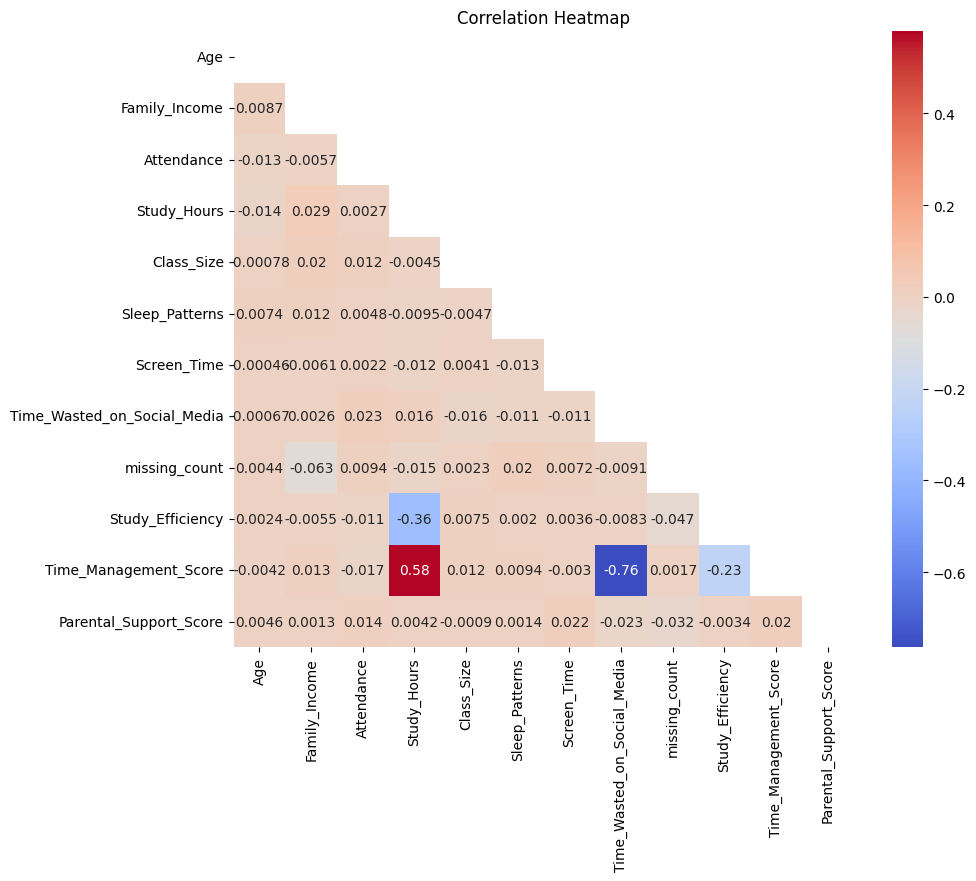

In [36]:
numerical_cols = df.select_dtypes(include=['float64']).columns
corr = df[numerical_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap');

In [37]:
categorical_cols = df.select_dtypes(include=['object']).columns
color_palette = sns.color_palette('husl', len(categorical_cols))
for index, col in enumerate(categorical_cols):
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar', color=color_palette[index])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count');

In [38]:
fig = px.histogram(df,  x = 'Attendance', facet_col = 'Grades_Num',
                   title = 'Grades Based On Attendance', facet_col_spacing = 0.1, )
fig.update_traces(marker_color = 'moccasin', marker_line_color = 'salmon',
                  marker_line_width = 1)
fig.update_annotations(font_color = 'plum')
fig.update_layout(barmode = 'group', title = {'font_color' : 'pink', 'x' : 0.5, 'y' : 0.9,
                                              'xanchor' : 'center', 'yanchor' : 'top'},
                  font_color = 'rosybrown')
fig.show()

In [39]:
fig = px.histogram(df, x = 'Study_Hours', facet_col = 'Grades_Num', facet_col_spacing = 0.1,
                   title = 'Grades Based On Study Hours')
fig.update_traces(marker_color = 'violet', marker_line_color = 'silver',
                  marker_line_width = 1)
fig.update_annotations(font_color = 'peru')
fig.update_layout(title = {'font_color' : 'seagreen', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  font_color = 'purple')
fig.show()

In [48]:
correlation = df.corr(numeric_only=True)

fig = px.imshow(correlation, text_auto = '.3f', title = 'Correlation Matrix',
                color_continuous_scale = 'Oranges')
fig.update_layout(title = {'font_color' : 'burlywood', 'x' : 0.5, 'y' : 0.9,
                           'xanchor' : 'center', 'yanchor' : 'top'},
                  font_color = 'violet')
fig.show()

# Implementation of a baseline model

In [45]:
!pip install mord


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=cc3813ea13e90481b26318969e8e0c1c216a130158cc3a2783bef647e17ae741
  Stored in directory: /root/.cache/pip/wheels/80/3e/3b/13f1adf346cad0fec675db328e4b0d814795c6c8e2fb659122
Successfully built mord


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from mord import OrdinalRidge   #Ordinal Logistic Regression
from xgboost import XGBClassifier


y = df["Grades_Num"]
X = df.drop(columns=['Grades_Num'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Ordinal Logistic Regression": OrdinalRidge(alpha=1.0),
    "XGBoost": XGBClassifier(
        objective="multi:softprob",
        num_class=3,
        eval_metric="mlogloss",
        tree_method="hist",
        enable_categorical=False)}

# Entraînement + Évaluation

results = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    results.append([name, acc])

    print("\n==============================")
    print(name)
    print("==============================")
    print("Accuracy :", acc)
    print("Report :")
    print(classification_report(y_test, preds))

df_results = pd.DataFrame(results, columns=["Modèle", "Accuracy"])
df_results = df_results.sort_values("Accuracy", ascending=False)
print("\n=== Résultats finaux ===")
print(df_results)



Random Forest
Accuracy : 0.32161555721765145
Report :
              precision    recall  f1-score   support

           0       0.31      0.33      0.32       893
           1       0.33      0.34      0.33       898
           2       0.32      0.30      0.31       883

    accuracy                           0.32      2674
   macro avg       0.32      0.32      0.32      2674
weighted avg       0.32      0.32      0.32      2674


Gradient Boosting
Accuracy : 0.34592370979805537
Report :
              precision    recall  f1-score   support

           0       0.33      0.35      0.34       893
           1       0.36      0.38      0.37       898
           2       0.35      0.31      0.33       883

    accuracy                           0.35      2674
   macro avg       0.35      0.35      0.35      2674
weighted avg       0.35      0.35      0.35      2674


Ordinal Logistic Regression
Accuracy : 0.33582647718773373
Report :
              precision    recall  f1-score   support



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




XGBoost
Accuracy : 0.3279730740463725
Report :
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       893
           1       0.32      0.33      0.32       898
           2       0.33      0.33      0.33       883

    accuracy                           0.33      2674
   macro avg       0.33      0.33      0.33      2674
weighted avg       0.33      0.33      0.33      2674


=== Résultats finaux ===
                        Modèle  Accuracy
1            Gradient Boosting  0.345924
2  Ordinal Logistic Regression  0.335826
3                      XGBoost  0.327973
0                Random Forest  0.321616


In [ ]:
"""
y = df["Grades_Num"]              # cible
X = df.drop(columns=["Grades", "Grades_Num"])

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test, y_pred):.3f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
"""